In [1]:
import numpy as np 

In [2]:
import sys

In [3]:
import matplotlib.pyplot as plt

###### Please change directory

In [4]:
sys.path.append('/sdcc/u/ccao/scripts/Lightshow-master/lightshow')

In [5]:
from postprocess.parse import *

In [6]:
path_feff = './data_parse_spectra/mp-1203/FEFF/000_Ti'
path_vasp = './data_parse_spectra/mp-1203/VASP/000_Ti'
path_xs = './data_parse_spectra/mp-1203/XSPECTRA/Spectra-6-6-5/0'
path_ocean = './data_parse_spectra/mp-1203/OCEAN/Spectra-8-8-6'
path_exciting = './data_parse_spectra/mp-1203/EXCITING/Spectra-8-8-6/0'

In [7]:
dict_feff = extract_FEFF(path_feff)
dict_vasp = extract_VASP(path_vasp)
dict_xs = extract_XSpectra(path_xs, es_out_file='./data_parse_spectra/mp-1203/XSPECTRA/es_0.out')
dict_ocean = extract_OCEAN(path_ocean, scf_out_file='./data_parse_spectra/mp-1203/OCEAN/scf.out')
dict_exciting = extract_exciting(path_exciting, INFO_out_file='./data_parse_spectra/mp-1203/EXCITING/INFO.OUT')

In [8]:
print("Fermi energy (in eV): ")
print("FEFF: ", dict_feff['efermi'])
print("VASP: ", dict_vasp['efermi'])
print("XSpectra: ", dict_xs['efermi'])
print("OCEAN: ", dict_ocean['efermi'])
print("exciting: ", dict_exciting['efermi'])

Fermi energy (in eV): 
FEFF:  -12.958
VASP:  9.3993185653
XSpectra:  14.3481
OCEAN:  14.5434
exciting:  10.830465269504959


In [9]:
print("Total energy (in eV): ")
# print("FEFF: ", dict_feff['total_energy'])
print("VASP: ", dict_vasp['total_energy'])
print("XSpectra: ", dict_xs['total_energy'])
print("OCEAN: ", dict_ocean['total_energy'])
print("exciting: ", dict_exciting['total_energy'])

Total energy (in eV): 
VASP:  -948.13693486
XSpectra:  -88730.60883198629
OCEAN:  -10346.646575314908
exciting:  -126422.96859040717


In [10]:
print("Super cell volume from VASP OUTCAR in Angstrom^3: ", dict_vasp['volume'])

Super cell volume from VASP OUTCAR in Angstrom^3:  870.3635


Text(0.5, 1.0, 'FEFF')

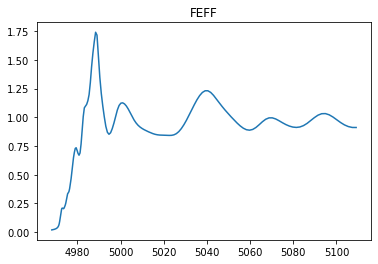

In [11]:
plt.plot(dict_feff['spectrum'][:,0],dict_feff['spectrum'][:,1])
plt.title('FEFF')

Text(0.5, 1.0, 'VASP')

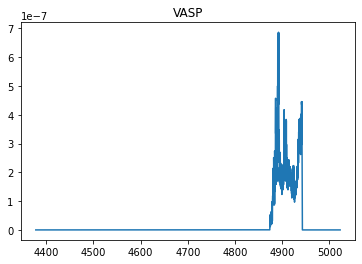

In [12]:
plt.plot(dict_vasp['spectrum'][:,0],dict_vasp['spectrum'][:,1])
plt.title('VASP')

Text(0.5, 1.0, 'XSpectra')

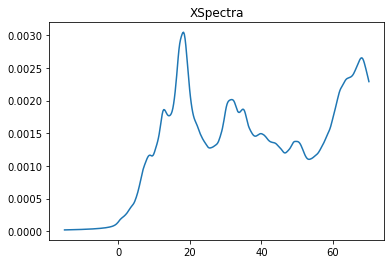

In [13]:
plt.plot(dict_xs['spectrum'][:,0],dict_xs['spectrum'][:,1])
plt.title('XSpectra')

Text(0.5, 1.0, 'OCEAN')

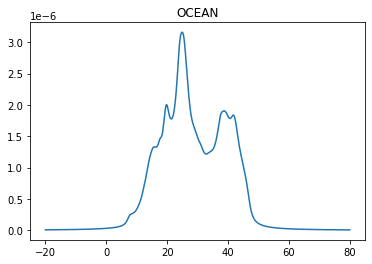

In [14]:
plt.plot(dict_ocean['Ti']['0001_1s']['spectrum'][:,0],dict_ocean['Ti']['0001_1s']['spectrum'][:,1])
plt.title('OCEAN')

Text(0.5, 1.0, 'exciting')

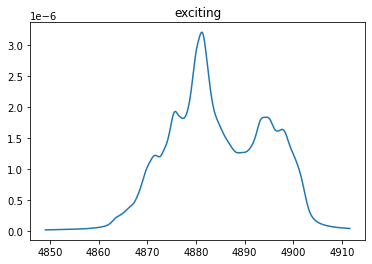

In [15]:
plt.plot(dict_exciting['spectrum'][:,0],dict_exciting['spectrum'][:,1])
plt.title('exciting')